<a href="https://colab.research.google.com/github/HVTrieuDuong/TRI-TUE-NHAN-TAO-HCMUTE/blob/main/FashionMnist(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, models, layers

In [3]:
(X_train, y_train),(X_test,y_test) = datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [6]:
X_train, X_test = X_train/255, X_test/255


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [11]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [14]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 106s 56ms/step - loss: 0.4368 - accuracy: 0.8411 - val_loss: 0.3284 - val_accuracy: 0.8802
Epoch 2/5
1875/1875 [==============================] - 163s 87ms/step - loss: 0.2905 - accuracy: 0.8927 - val_loss: 0.2765 - val_accuracy: 0.8958
Epoch 3/5
1875/1875 [==============================] - 108s 57ms/step - loss: 0.2468 - accuracy: 0.9084 - val_loss: 0.2667 - val_accuracy: 0.8999
Epoch 4/5
1875/1875 [==============================] - 101s 54ms/step - loss: 0.2136 - accuracy: 0.9210 - val_loss: 0.2552 - val_accuracy: 0.9095
Epoch 5/5
1875/1875 [==============================] - 100s 53ms/step - loss: 0.1889 - accuracy: 0.9285 - val_loss: 0.2649 - val_accuracy: 0.9052


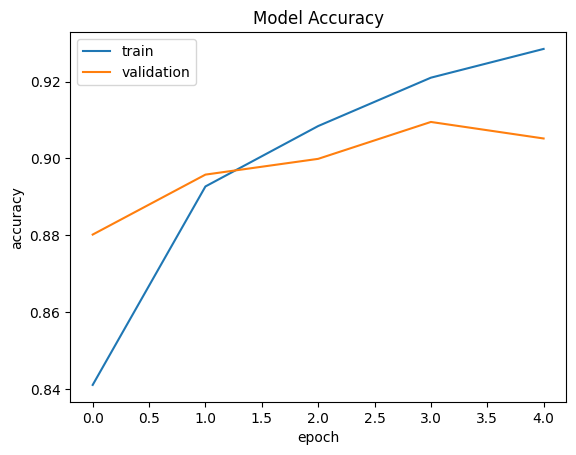

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')
